In [121]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale = 1.5)
sns.set_context(rc={"lines.markersize": 10}) # controls size of style markers in line plots
#sns.set(rc={'figure.figsize':(10,10)})
import matplotlib
#matplotlib.use('agg')
#matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
new_plot_col=list(range(1800,2010,20))
from scipy.stats.stats import pearsonr
from scipy.stats.stats import pearsonr
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES
lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
from functools import reduce

In [2]:
def lemma_maker(x, y):
    #print(lemmatizer(x,y)[0])
    return lemmatizer(x,y)[0]

In [3]:
br_to_us=pd.read_excel("Book.xlsx",skiprows=[0])
br_to_us_dict=dict(zip(br_to_us.UK.tolist(),br_to_us.US.tolist()))
spelling_replacement={'modifier':br_to_us_dict,'head':br_to_us_dict}

In [5]:
reddy11_study=pd.read_csv("../../MeanAndDeviations.clean.txt",sep="\t")
#print(reddy11_study.columns)
reddy11_study.columns=['compound','to_divide']
reddy11_study['modifier_mean'],reddy11_study['modifier_std'],reddy11_study['head_mean'],reddy11_study['head_std'],reddy11_study['compound_mean'],reddy11_study['compound_std'],_=reddy11_study.to_divide.str.split(" ",7).str
reddy11_study['modifier'],reddy11_study['head']=reddy11_study['compound'].str.split(" ",2).str
reddy11_study.modifier=reddy11_study.modifier.str[:-2]
reddy11_study['head']=reddy11_study['head'].str[:-2]
reddy11_study.drop(['compound','to_divide'],axis=1,inplace=True)
#reddy11_study['modifier']=np.vectorize(lemma_maker)(reddy11_study['modifier'],'n')
reddy11_study['head']=np.vectorize(lemma_maker)(reddy11_study['head'],'n')
reddy11_study.replace(spelling_replacement,inplace=True)
reddy11_study['modifier']=reddy11_study['modifier']+"_noun"
reddy11_study['head']=reddy11_study['head']+"_noun"
reddy11_study=reddy11_study.apply(pd.to_numeric, errors='ignore')
#reddy11_study.set_index(['modifier','head'],inplace=True)
reddy11_study.head()
reddy11_study['compound_rating']=''
#application_noun	form_noun

In [6]:
reddy11_study.loc[reddy11_study.compound_mean>=4,'compound_rating']='high'
reddy11_study.loc[(reddy11_study.compound_mean>=2) & (reddy11_study.compound_mean<4),'compound_rating']='med'
reddy11_study.loc[reddy11_study.compound_mean<2,'compound_rating']='low'
reddy11_study.compound_rating.value_counts()

low     36
med     30
high    24
Name: compound_rating, dtype: int64

heads=pd.read_pickle("../../heads_CompoundAware_10_50_300.pkl")

modifiers=pd.read_pickle("../../modifiers_CompoundAware_10_50_300.pkl")

In [9]:
features=pd.read_csv("../../features_CompoundAware_20_100_300.csv", sep="\t")
features=features.merge(reddy11_study[['modifier','head','compound_rating']],on=['modifier','head'])

In [10]:
to_add_cols=['compound_mean','compound_rating']
lmi_cols = [col for col in features.columns if 'local_mi' in col]
llr_cols = [col for col in features.columns if 'log_ratio' in col]
ppmi_cols = [col for col in features.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in features.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in features.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in features.columns if 'sim_with_modifier' in col]
#selected_compounds=['health insurance','silver bullet','melting pot','gold mine','swimming pool','bank account']
#assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(features.columns))

In [11]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
lmi_df.reset_index(inplace=True)
lmi_df['compound']=lmi_df['modifier'].str[:-5]+' '+lmi_df['head'].str[:-5]
lmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
lmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in lmi_df.columns if 'compound' not in x]
lmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
lmi_df.reset_index(inplace=True)
plot_lmi_df=pd.melt(lmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
lmi_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.048,0.091,0.090,0.087,0.097,0.097,0.096,0.517,0.427,0.312,0.300,4.250,high
1,firing line,0.048,0.091,0.090,0.087,0.097,0.404,0.416,0.391,0.371,0.364,0.373,1.704,low
2,game plan,0.048,0.091,0.090,0.087,0.097,0.097,0.096,0.101,0.294,0.267,0.253,3.828,med
3,application form,0.048,0.091,0.090,0.087,0.097,0.551,0.500,0.492,0.365,0.269,0.256,4.800,high
4,web site,0.048,0.091,0.090,0.087,0.097,0.097,0.640,0.101,0.463,0.337,0.294,3.786,med


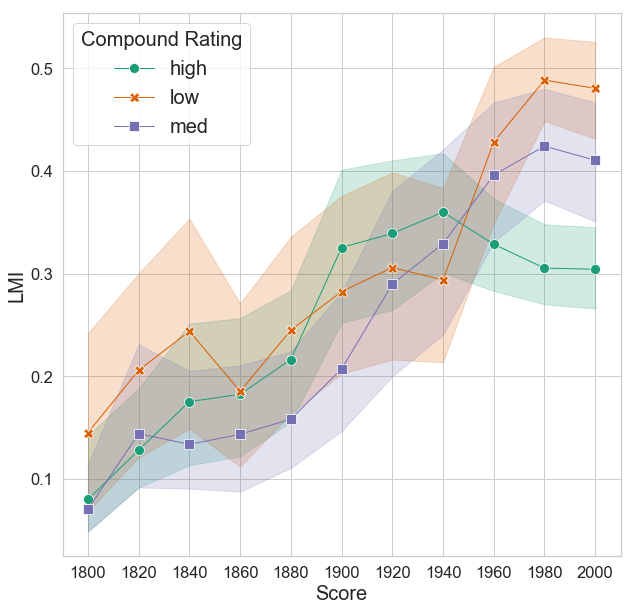

In [214]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_lmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LMI", fontsize=20)
g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('LMI_merged.png')

In [13]:
llr_df=features.set_index(["modifier", "head"])[llr_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
llr_df.reset_index(inplace=True)
llr_df['compound']=llr_df['modifier'].str[:-5]+' '+llr_df['head'].str[:-5]
llr_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
llr_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in llr_df.columns if 'compound' not in x]
llr_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
llr_df.reset_index(inplace=True)
plot_llr_df=pd.melt(llr_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
llr_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.355,0.251,0.131,0.123,4.250,high
1,firing line,0.000,0.000,0.000,0.000,0.000,0.240,0.254,0.225,0.194,0.185,0.198,1.704,low
2,game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.115,0.087,0.078,3.828,med
3,application form,0.000,0.000,0.000,0.000,0.000,0.408,0.343,0.333,0.187,0.089,0.081,4.800,high
4,web site,0.000,0.000,0.000,0.000,0.000,0.000,0.482,0.000,0.290,0.156,0.117,3.786,med


AttributeError: Unknown property scatter_kws

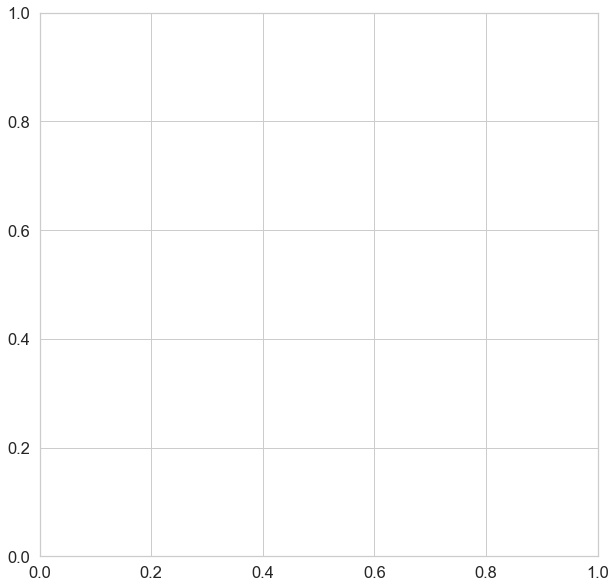

In [186]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_llr_df,palette="Dark2", marker='o',linewidth=1,dashes=False,scatter_kws={"s": 100})#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("LLR", fontsize=20)
g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('LLR_merged.png')

In [15]:
ppmi_df=features.set_index(["modifier", "head"])[ppmi_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
ppmi_df.reset_index(inplace=True)
ppmi_df['compound']=ppmi_df['modifier'].str[:-5]+' '+ppmi_df['head'].str[:-5]
ppmi_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
ppmi_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in ppmi_df.columns if 'compound' not in x]
ppmi_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
ppmi_df.reset_index(inplace=True)
plot_ppmi_df=pd.melt(ppmi_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
ppmi_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.469,0.353,0.214,0.206,4.250,high
1,firing line,0.000,0.000,0.000,0.000,0.000,0.343,0.358,0.325,0.287,0.273,0.288,1.704,low
2,game plan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.162,0.151,3.828,med
3,application form,0.000,0.000,0.000,0.000,0.000,0.510,0.452,0.440,0.281,0.164,0.155,4.800,high
4,web site,0.000,0.000,0.000,0.000,0.000,0.000,0.603,0.000,0.392,0.242,0.198,3.786,med


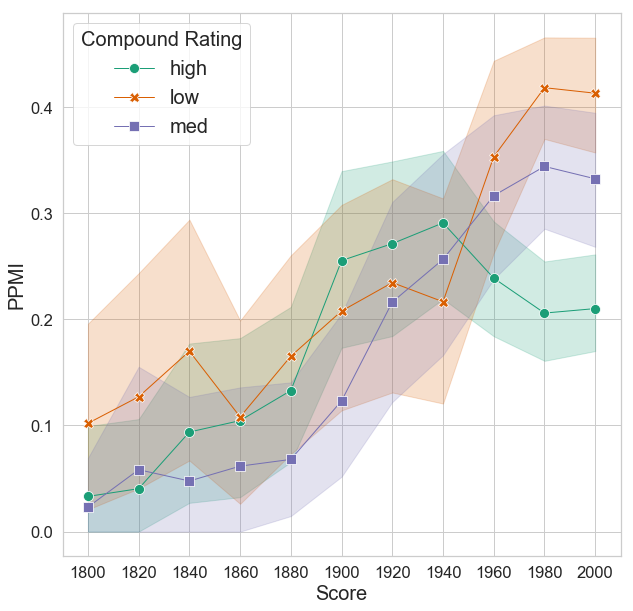

In [215]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_ppmi_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("PPMI", fontsize=20)
g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('PPMI_merged.png')

In [17]:
sim_bw_constituents_df=features.set_index(["modifier", "head"])[sim_bw_constituents_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_bw_constituents_df.reset_index(inplace=True)
sim_bw_constituents_df['compound']=sim_bw_constituents_df['modifier'].str[:-5]+' '+sim_bw_constituents_df['head'].str[:-5]
sim_bw_constituents_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_bw_constituents_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_bw_constituents_df.columns if 'compound' not in x]
sim_bw_constituents_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_bw_constituents_df.reset_index(inplace=True)
plot_sim_bw_constituents_df=pd.melt(sim_bw_constituents_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_bw_constituents_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.150,0.151,0.167,0.239,0.379,0.175,0.178,0.210,0.626,0.563,0.224,4.250,high
1,firing line,0.150,0.151,0.167,0.239,0.379,0.211,0.332,0.563,0.561,0.314,0.304,1.704,low
2,game plan,0.150,0.151,0.167,0.239,0.379,0.175,0.178,0.210,0.372,0.248,0.255,3.828,med
3,application form,0.150,0.151,0.167,0.239,0.379,0.704,0.747,0.779,0.742,0.540,0.621,4.800,high
4,web site,0.150,0.151,0.167,0.239,0.379,0.175,0.176,0.210,0.350,0.222,0.221,3.786,med


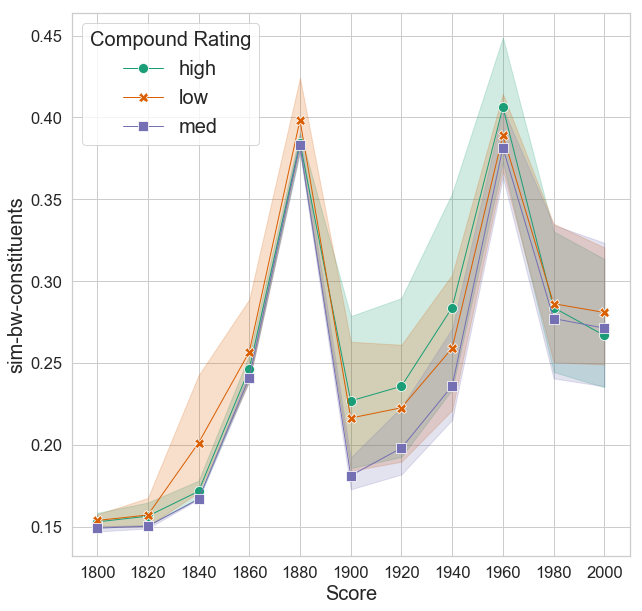

In [216]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_bw_constituents_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-bw-constituents", fontsize=20)
g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-bw-const_merged.png')

In [19]:
sim_with_head_df=features.set_index(["modifier", "head"])[sim_with_head_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_head_df.reset_index(inplace=True)
sim_with_head_df['compound']=sim_with_head_df['modifier'].str[:-5]+' '+sim_with_head_df['head'].str[:-5]
sim_with_head_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_head_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_head_df.columns if 'compound' not in x]
sim_with_head_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_head_df.reset_index(inplace=True)
plot_sim_with_head_df=pd.melt(sim_with_head_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_head_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.143,0.263,0.262,0.260,0.438,0.261,0.261,0.361,0.853,0.855,0.444,4.250,high
1,firing line,0.143,0.263,0.262,0.260,0.438,0.281,0.276,0.374,0.360,0.394,0.432,1.704,low
2,game plan,0.143,0.263,0.262,0.260,0.438,0.261,0.261,0.360,0.350,0.396,0.422,3.828,med
3,application form,0.143,0.263,0.262,0.260,0.438,0.801,0.817,0.823,0.811,0.819,0.840,4.800,high
4,web site,0.143,0.263,0.262,0.260,0.438,0.261,0.253,0.360,0.345,0.386,0.423,3.786,med


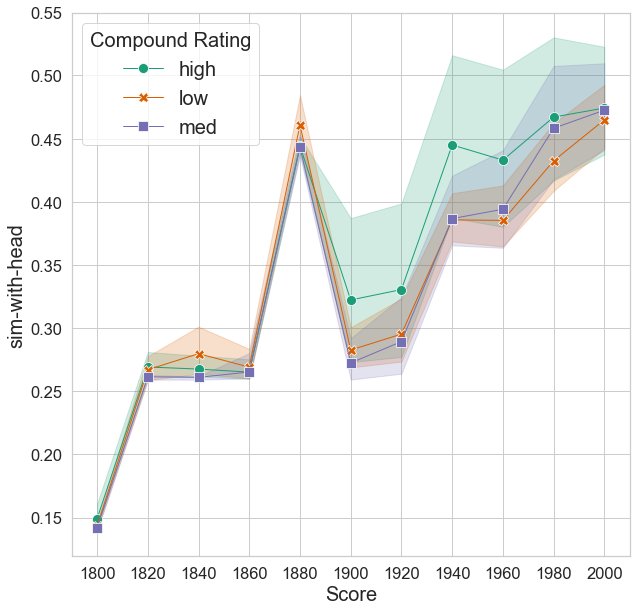

In [217]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_head_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-head", fontsize=20)
g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-with-head_merged.png')

In [21]:
sim_with_modifier_df=features.set_index(["modifier", "head"])[sim_with_modifier_cols+to_add_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
#lmi_df.columns=new_plot_col
sim_with_modifier_df.reset_index(inplace=True)
sim_with_modifier_df['compound']=sim_with_modifier_df['modifier'].str[:-5]+' '+sim_with_modifier_df['head'].str[:-5]
sim_with_modifier_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_lmi_df=plot_lmi_df.loc[plot_lmi_df['compound'].isin(selected_compounds)]
sim_with_modifier_df.set_index('compound',inplace=True)
#plot_lmi_df=plot_lmi_df[plot_lmi_df.columns[10:]]
old_vars=[x.split('_')[0] for x in sim_with_modifier_df.columns if 'compound' not in x]
sim_with_modifier_df.columns=old_vars+to_add_cols
#plot_lmi_df.columns
#lmi_df.info()
sim_with_modifier_df.reset_index(inplace=True)
plot_sim_with_modifier_df=pd.melt(sim_with_modifier_df,id_vars=['compound','compound_rating','compound_mean'],
                        value_vars=old_vars)
sim_with_modifier_df.head()

,compound,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000,compound_mean,compound_rating
0,end user,0.211,0.229,0.218,0.211,0.326,0.220,0.250,0.279,0.259,0.349,0.335,4.250,high
1,firing line,0.211,0.229,0.218,0.211,0.326,0.286,0.296,0.277,0.244,0.322,0.306,1.704,low
2,game plan,0.211,0.229,0.218,0.211,0.326,0.220,0.250,0.283,0.882,0.775,0.337,3.828,med
3,application form,0.211,0.229,0.218,0.211,0.326,0.238,0.267,0.300,0.279,0.360,0.340,4.800,high
4,web site,0.211,0.229,0.218,0.211,0.326,0.220,0.239,0.283,0.368,0.387,0.384,3.786,med


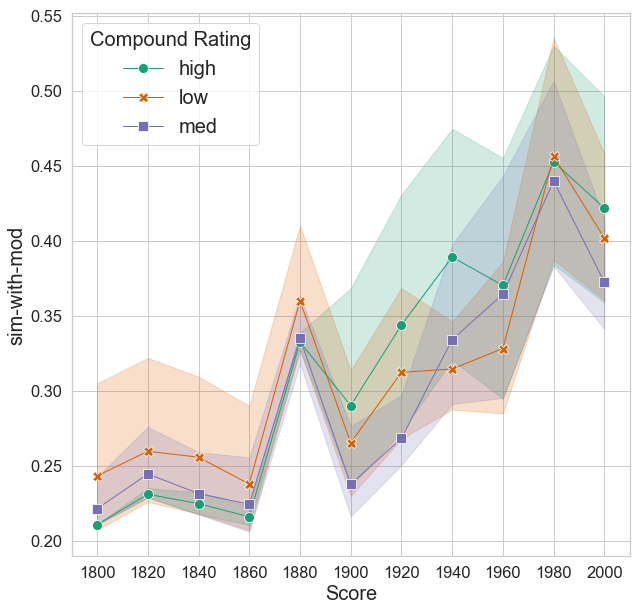

In [218]:
plt.figure(figsize=(10,10))
g=sns.lineplot(x="variable", y="value", hue="compound_rating",style="compound_rating",data=plot_sim_with_modifier_df,palette="Dark2", marker='o',linewidth=1,dashes=False,markers=True)#,err_style="bars", ci=68)
g.set_xlabel("Score", fontsize=20)
g.set_ylabel("sim-with-mod", fontsize=20)
g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
#g.set_xlim(1799, 2000)
plt.savefig('sim-with-mod_merged.png')

In [124]:
compounds=pd.read_pickle("../../compounds_CompoundAware_1_20_300.pkl")
compounds.head()

common     0     1     2     3     4  \
modifier head         time                                                      
a_noun   addison_noun 1975  a_noun addison_noun 0.001 0.000 0.010 0.006 0.011   
                      1980  a_noun addison_noun 0.001 0.000 0.010 0.006 0.011   
                      1981  a_noun addison_noun 0.001 0.000 0.010 0.006 0.011   
                      1984  a_noun addison_noun 0.001 0.000 0.010 0.006 0.011   
                      1985  a_noun addison_noun 0.001 0.000 0.010 0.006 0.011   

                                5      6      7      8  ...    290    291  \
modifier head         time                              ...                 
a_noun   addison_noun 1975 -0.014 -0.011 -0.004 -0.007  ... -0.053 -0.003   
                      1980 -0.014 -0.011 -0.004 -0.007  ... -0.053 -0.003   
                      1981 -0.014 -0.011 -0.004 -0.007  ... -0.053 -0.003   
                      1984 -0.014 -0.011 -0.004 -0.007  ... -0.053 -0.003   
                      1985 -0.014 -0.011 -0.004 -0.007  ... -0.053 -0.003   

                             292    293    294   295    296    297   298   299  
modifier head         time                                                      
a_noun   addison_noun 1975 0.048 -0.006 -0.003 0.042 -0.016 -0.000 0.014 0.073  
                      1980 0.048 -0.006 -0.003 0.042 -0.016 -0.000 0.014 0.073  
                      1981 0.048 -0.006 -0.003 0.042 -0.016 -0.000 0.014 0.073  
                      1984 0.048 -0.006 -0.003 0.042 -0.016 -0.000 0.014 0.073  
                      1985 0.048 -0.006 -0.003 0.042 -0.016 -0.000 0.014 0.073  

[5 rows x 301 columns]

In [154]:
merge_df_aware=reddy11_study[['modifier','head','compound_rating']].merge(compounds.drop(['common'],axis=1).reset_index(),on=['modifier','head'],how='inner')
merge_df_aware.set_index(["modifier", "head",'time','compound_rating'], inplace = True)
merge_df_aware.info()
merge_df_aware.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5115 entries, (end_noun, user_noun, 1956, high) to (bank_noun, account_noun, 2008, high)
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 11.7+ MB


0     1     2     3     4      5    \
modifier head      time compound_rating                                        
end_noun user_noun 1956 high            0.110 0.013 0.097 0.032 0.292 -0.330   
                   1959 high            0.120 0.015 0.113 0.037 0.324 -0.363   
                   1962 high            0.131 0.016 0.107 0.035 0.333 -0.377   
                   1964 high            0.122 0.015 0.110 0.036 0.321 -0.364   
                   1966 high            0.119 0.015 0.112 0.037 0.322 -0.361   

                                           6      7      8      9    ...  \
modifier head      time compound_rating                              ...   
end_noun user_noun 1956 high            -0.479 -0.087 -0.172 -0.268  ...   
                   1959 high            -0.532 -0.095 -0.196 -0.312  ...   
                   1962 high            -0.552 -0.110 -0.172 -0.233  ...   
                   1964 high            -0.534 -0.096 -0.193 -0.305  ...   
                   1966 high            -0.530 -0.096 -0.195 -0.309  ...   

                                           290    291    292    293    294  \
modifier head      time compound_rating                                      
end_noun user_noun 1956 high            -0.021 -0.006 -0.009  0.010 -0.051   
                   1959 high            -0.009  0.011 -0.024 -0.008  0.009   
                   1962 high             0.006 -0.026 -0.004  0.011  0.009   
                   1964 high             0.030  0.013  0.004  0.003 -0.030   
                   1966 high             0.004  0.025 -0.017 -0.004 -0.004   

                                           295    296    297    298    299  
modifier head      time compound_rating                                     
end_noun user_noun 1956 high            -0.018  0.015 -0.024  0.032  0.005  
                   1959 high            -0.004  0.003 -0.021  0.003  0.032  
                   1962 high            -0.036  0.019  0.027 -0.005 -0.013  
                   1964 high             0.027 -0.031  0.004  0.007 -0.019  
                   1966 high            -0.002 -0.013 -0.003  0.003  0.028  

[5 rows x 300 columns]

In [157]:
def cosine(row1,row2):
    if row1.name[:-2]!=row2.name[:-2]:
        return np.nan
    else:
        denom1=np.sqrt(np.sum(np.square(row1)))
        denom2=np.sqrt(np.sum(np.square(row2)))
        num=np.sum(row1*row2)
        return num/(denom1*denom2)

In [159]:
cosine(merge_df_aware.iloc[2-1],merge_df_aware.iloc[2])

0.770934994171902

In [160]:
cosine_compound_agnostic=[np.nan]
for i in range(1,merge_df_aware.shape[0]):
    cosine_compound_agnostic.append(cosine(merge_df_aware.iloc[i-1],merge_df_aware.iloc[i]))

In [171]:
merge_df_aware['compound_cosine']=cosine_compound_agnostic
compound_df=pd.pivot_table(merge_df_aware.reset_index(), values = 'compound_cosine', index=['modifier','head','compound_rating'], columns = 'time')
compound_df.head()

,,time,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
modifier,head,compound_rating,,,,,,,,,,,,,,,,,,,,,
acid_noun,test_noun,low,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.950,1.000,0.998,0.982,0.977,0.997,0.976,0.985,0.868,0.980
application_noun,form_noun,high,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.993,0.992,0.990,0.992,0.995,0.997,0.997,0.990,0.995,0.994
balance_noun,sheet_noun,med,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.995,0.997,0.999,0.998,0.997,0.997,0.997,0.998,0.999,0.996
bank_noun,account_noun,high,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.992,0.992,0.997,0.995,0.992,0.998,0.996,0.999,0.998,0.997
blame_noun,game_noun,med,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,0.760,0.840,0.965,0.906,0.933,0.975,0.830,0.889,0.994,0.976


In [162]:
compound_df.reset_index(inplace=True)
compound_df['compound']=compound_df['modifier'].str[:-5]+' '+compound_df['head'].str[:-5]
compound_df.drop(['modifier','head'],axis=1,inplace=True)
#plot_compound_df=plot_compound_df.loc[plot_compound_df['compound'].isin(selected_compounds)]
#compound_df.set_index('compound',inplace=True)
#plot_compound_df=plot_compound_df[plot_compound_df.columns[10:]]
plot_compound_df=pd.melt(compound_df,id_vars=['compound','compound_rating'],
                        value_vars=list(range(1801,2009,1)))
plot_compound_df

,compound,compound_rating,time,value
0,acid test,low,1801,nan
1,application form,high,1801,nan
2,balance sheet,med,1801,nan
3,bank account,high,1801,nan
4,blame game,med,1801,nan
5,brick wall,med,1801,nan
6,call center,high,1801,nan
7,car park,high,1801,nan
8,case study,med,1801,nan
9,cash cow,low,1801,nan


(1900, 2009)

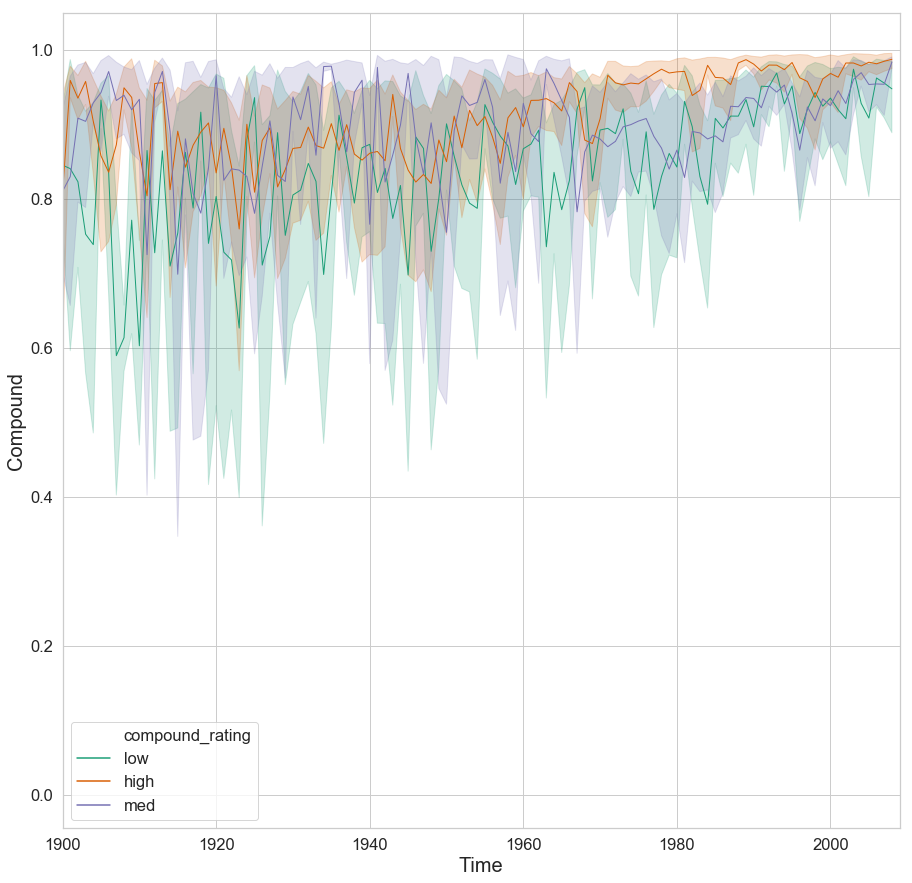

In [168]:
plt.figure(figsize=(15,15))
g=sns.lineplot(x="time", y="value", hue="compound_rating",style="compound_rating",data=plot_compound_df,palette="Dark2",linewidth=1,dashes=False)#,err_style="bars", ci=68)
g.set_xlabel("Time", fontsize=20)
g.set_ylabel("Compound", fontsize=20)
#g.legend(title='Compound Rating', loc='upper left', labels=["high", "low", "med"], fontsize=20, title_fontsize=20)
#g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
g.set_xlim(1900, 2009)

In [85]:
merge_df_aware_heads=reddy11_study[['modifier','head']].merge(heads.reset_index(),on=['head'],how='inner')
merge_df_aware_heads.set_index(["modifier", "head",'time'], inplace = True)
merge_df_aware_heads.head()

0     1     2     3     4      5      6      7    \
modifier head      time                                                      
end_noun user_noun 1870 0.000 0.000 0.001 0.000 0.003 -0.003 -0.004 -0.001   
                   1880 0.001 0.000 0.001 0.000 0.006 -0.003 -0.005 -0.002   
                   1890 0.001 0.000 0.001 0.000 0.005 -0.005 -0.007 -0.002   
                   1900 0.014 0.013 0.008 0.002 0.030 -0.030 -0.044 -0.002   
                   1910 0.010 0.006 0.008 0.002 0.039 -0.037 -0.058 -0.003   

                           8      9    ...    290    291    292    293    294  \
modifier head      time                ...                                      
end_noun user_noun 1870 -0.002 -0.003  ...  0.050  0.003  0.016 -0.060 -0.027   
                   1880 -0.002 -0.005  ...  0.038 -0.002  0.038 -0.073 -0.018   
                   1890 -0.002 -0.005  ... -0.014 -0.084  0.085 -0.093  0.045   
                   1900 -0.011 -0.036  ... -0.008 -0.042  0.036 -0.046  0.000   
                   1910 -0.014 -0.043  ...  0.016 -0.014 -0.034  0.022 -0.021   

                           295    296    297    298    299  
modifier head      time                                     
end_noun user_noun 1870 -0.006  0.003 -0.001  0.047  0.013  
                   1880 -0.011 -0.020 -0.021  0.038  0.014  
                   1890 -0.031 -0.112 -0.117 -0.020 -0.050  
                   1900 -0.051 -0.075 -0.099  0.017 -0.044  
                   1910 -0.045  0.015 -0.047  0.054 -0.034  

[5 rows x 300 columns]

In [88]:
cosine_head_agnostic=[np.nan]
for i in range(1,merge_df_aware_heads.shape[0]):
    cosine_head_agnostic.append(cosine(merge_df_aware_heads.iloc[i-1],merge_df_aware_heads.iloc[i]))

In [91]:
merge_df_aware_heads['head_cosine']=cosine_head_agnostic
head_df=pd.pivot_table(merge_df_aware_heads.reset_index(), values = 'head_cosine', index=['modifier','head'], columns = 'time')
head_df

,time,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
modifier,head,,,,,,,,,,,,,,,,,,,,
acid_noun,test_noun,0.989,0.972,0.956,0.957,0.919,0.923,0.713,0.823,0.657,0.806,0.792,0.785,0.989,0.963,0.989,0.994,0.995,0.990,0.990,0.995
agony_noun,aunt_noun,0.531,0.645,0.846,0.833,0.905,0.870,0.874,0.448,0.260,0.729,0.865,0.997,0.998,0.989,0.994,0.857,0.894,0.929,0.708,0.715
application_noun,form_noun,0.916,0.906,0.875,0.925,0.853,0.924,0.949,0.949,0.972,0.996,0.788,0.989,0.957,0.991,0.996,0.992,0.984,0.989,0.986,0.994
balance_noun,sheet_noun,0.790,0.862,0.977,0.981,0.991,0.997,0.997,0.998,0.998,0.997,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
bank_noun,account_noun,0.976,0.860,0.877,0.975,0.967,0.846,0.879,0.917,0.961,0.899,0.968,0.980,0.979,0.993,0.967,0.970,0.965,0.945,0.989,0.980
blame_noun,game_noun,0.772,0.909,0.899,0.855,0.845,0.773,0.394,0.571,0.839,0.805,0.832,0.961,0.970,0.989,0.986,0.979,0.991,0.990,0.991,0.984
brass_noun,ring_noun,0.856,0.911,0.936,0.952,0.975,0.987,0.989,0.968,0.980,0.971,0.969,0.994,0.972,0.983,0.995,0.996,0.962,0.944,0.990,0.955
brick_noun,wall_noun,0.995,0.989,0.985,0.994,0.993,0.995,0.993,0.990,0.993,0.994,0.971,0.988,0.992,0.996,0.971,0.985,0.991,0.999,0.984,0.991
call_noun,center_noun,0.211,0.021,0.758,0.203,0.680,0.823,0.913,0.970,0.957,0.976,0.976,0.978,0.983,0.927,0.875,0.933,0.909,0.986,0.985,0.981


In [92]:
plot_head_df=head_df.reset_index()
plot_head_df['compound']=plot_head_df['modifier'].str[:-5]+' '+plot_head_df['head'].str[:-5]
plot_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_df.set_index('compound',inplace=True)
plot_head_df

time,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
compound,,,,,,,,,,,,,,,,,,,,
acid test,0.989,0.972,0.956,0.957,0.919,0.923,0.713,0.823,0.657,0.806,0.792,0.785,0.989,0.963,0.989,0.994,0.995,0.990,0.990,0.995
agony aunt,0.531,0.645,0.846,0.833,0.905,0.870,0.874,0.448,0.260,0.729,0.865,0.997,0.998,0.989,0.994,0.857,0.894,0.929,0.708,0.715
application form,0.916,0.906,0.875,0.925,0.853,0.924,0.949,0.949,0.972,0.996,0.788,0.989,0.957,0.991,0.996,0.992,0.984,0.989,0.986,0.994
balance sheet,0.790,0.862,0.977,0.981,0.991,0.997,0.997,0.998,0.998,0.997,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
bank account,0.976,0.860,0.877,0.975,0.967,0.846,0.879,0.917,0.961,0.899,0.968,0.980,0.979,0.993,0.967,0.970,0.965,0.945,0.989,0.980
blame game,0.772,0.909,0.899,0.855,0.845,0.773,0.394,0.571,0.839,0.805,0.832,0.961,0.970,0.989,0.986,0.979,0.991,0.990,0.991,0.984
brass ring,0.856,0.911,0.936,0.952,0.975,0.987,0.989,0.968,0.980,0.971,0.969,0.994,0.972,0.983,0.995,0.996,0.962,0.944,0.990,0.955
brick wall,0.995,0.989,0.985,0.994,0.993,0.995,0.993,0.990,0.993,0.994,0.971,0.988,0.992,0.996,0.971,0.985,0.991,0.999,0.984,0.991
call center,0.211,0.021,0.758,0.203,0.680,0.823,0.913,0.970,0.957,0.976,0.976,0.978,0.983,0.927,0.875,0.933,0.909,0.986,0.985,0.981


<Figure size 720x720 with 0 Axes>

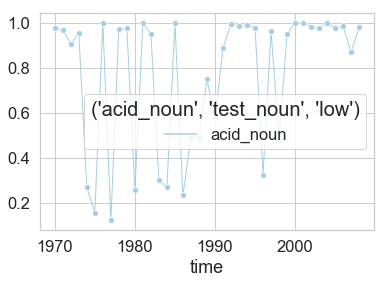

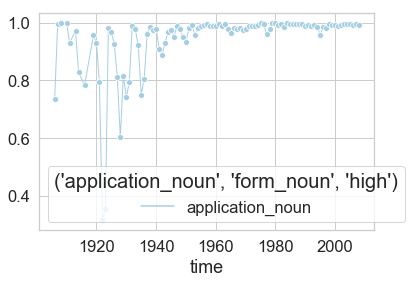

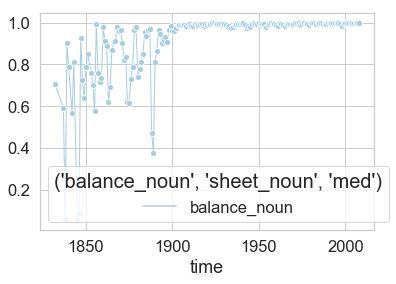

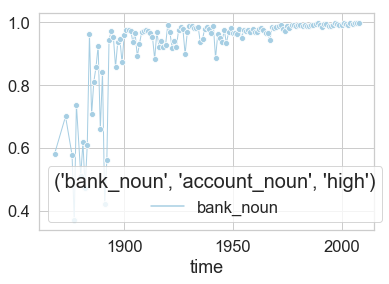

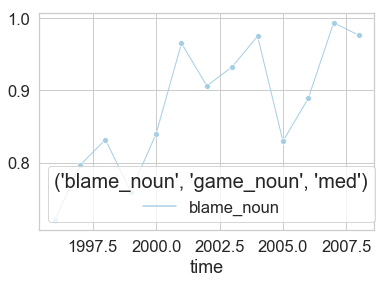

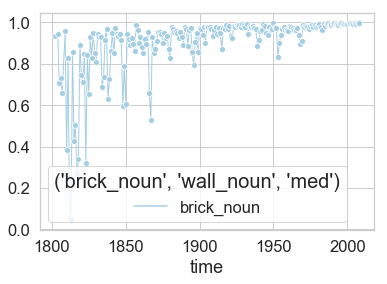

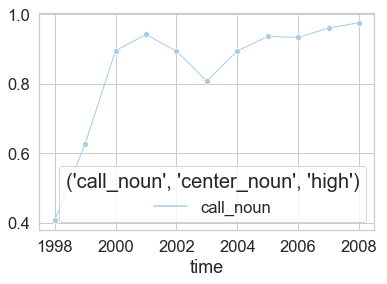

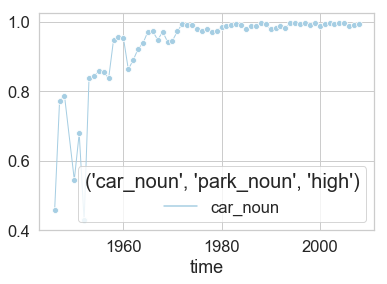

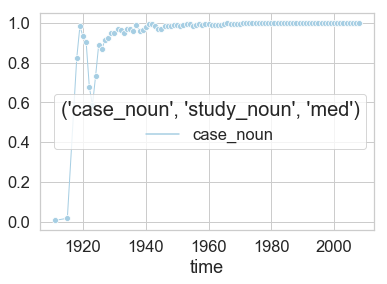

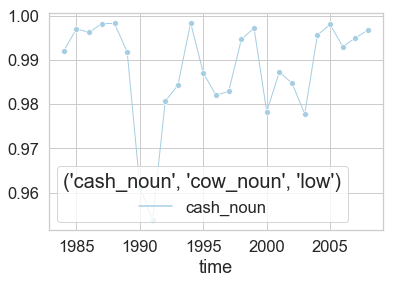

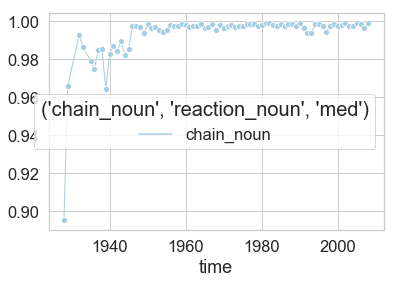

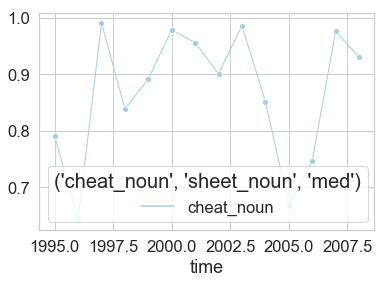

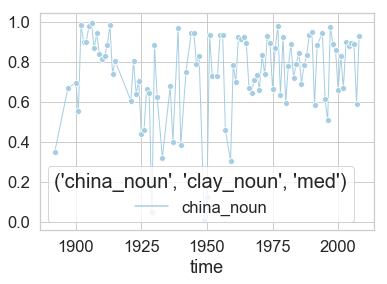

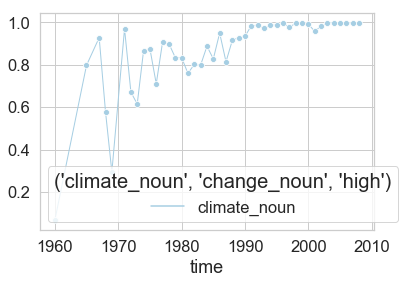

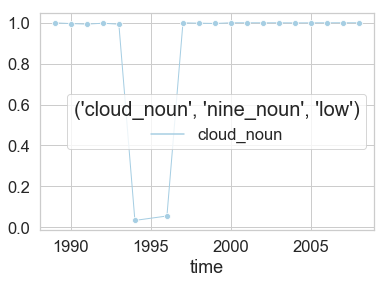

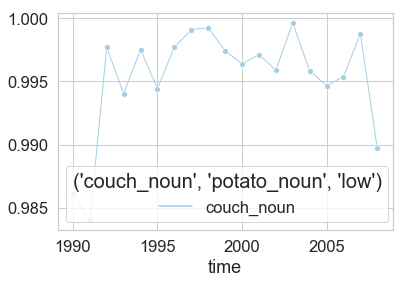

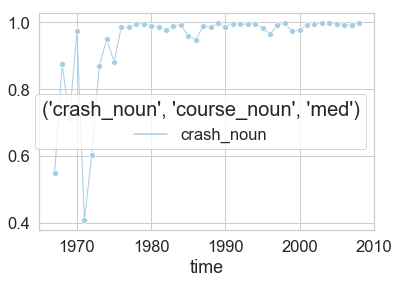

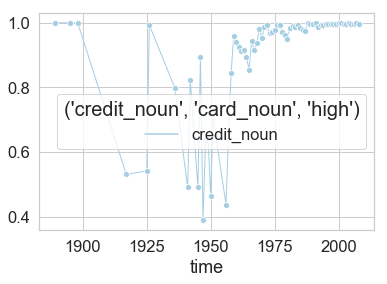

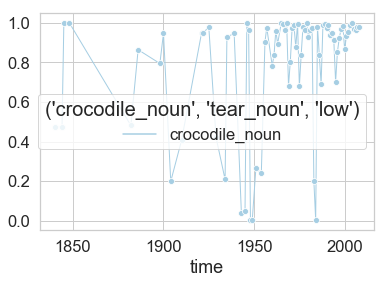

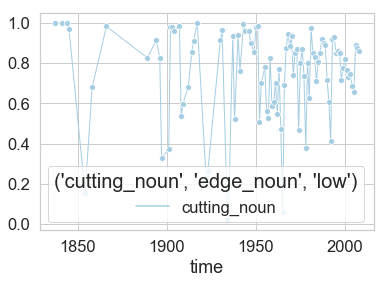

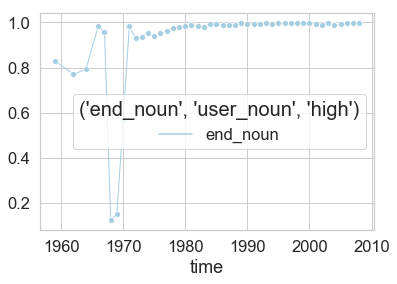

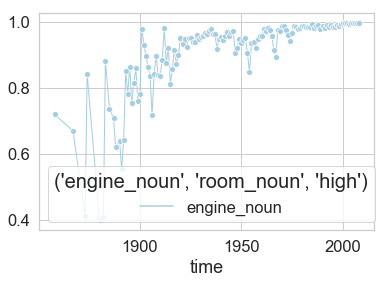

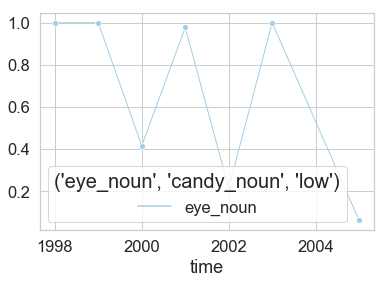

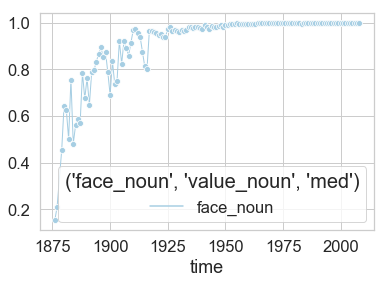

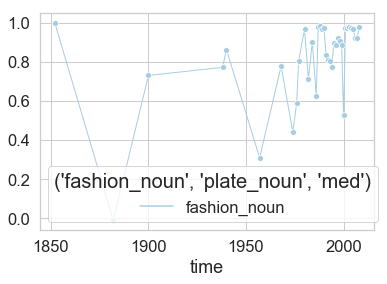

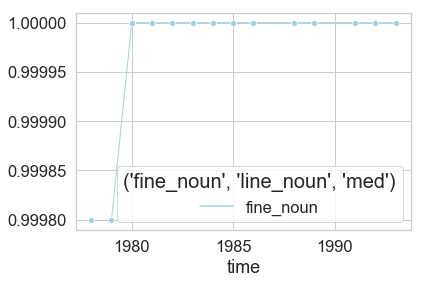

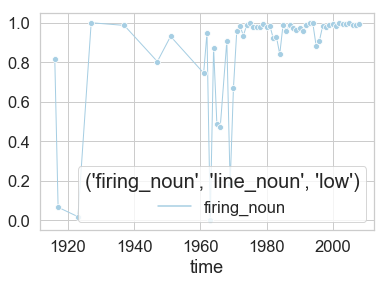

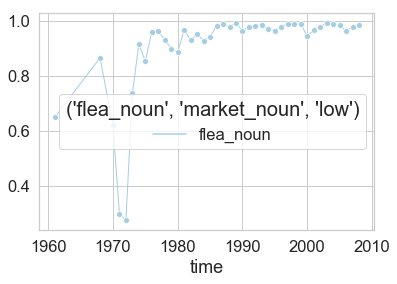

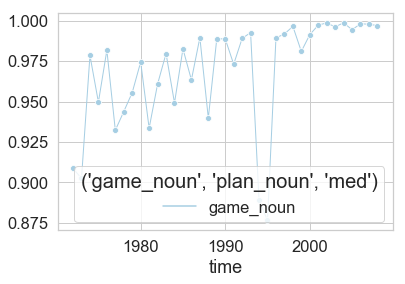

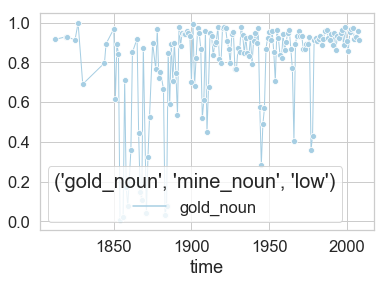

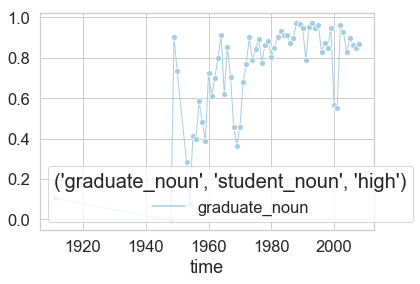

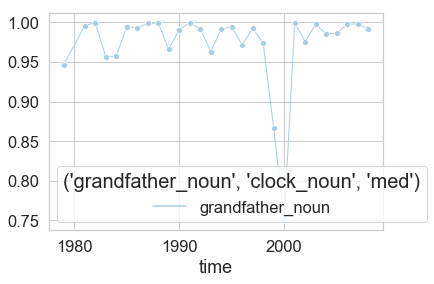

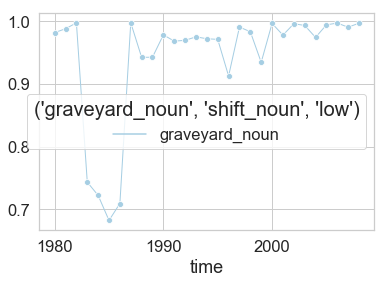

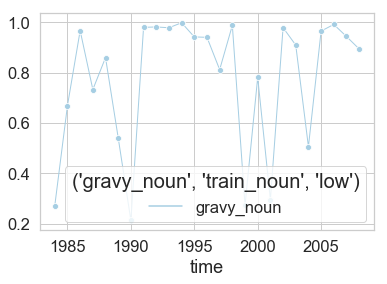

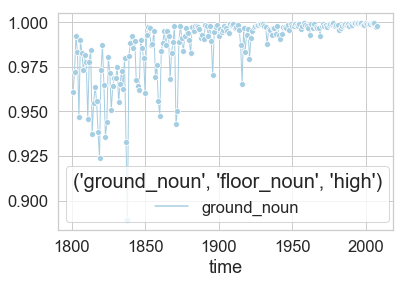

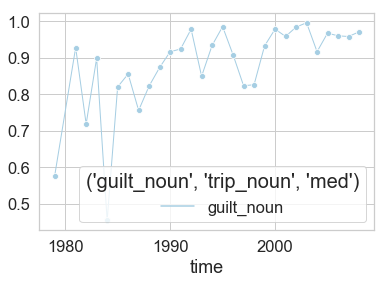

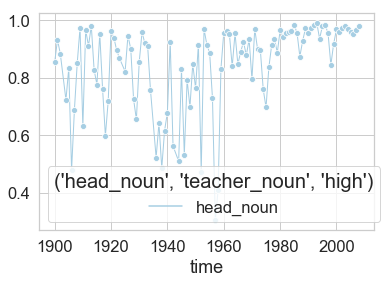

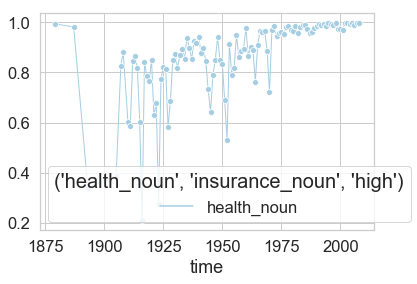

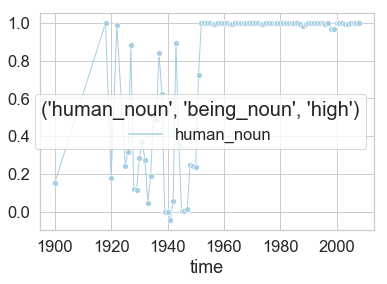

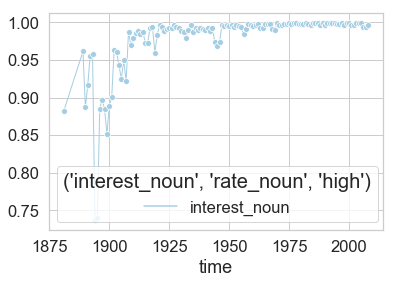

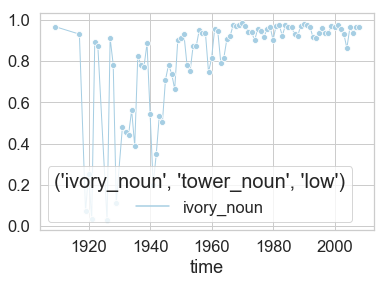

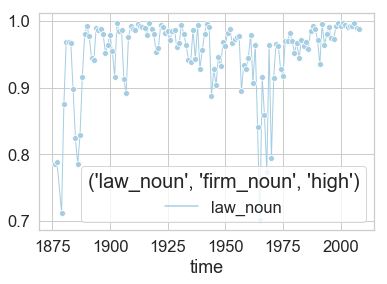

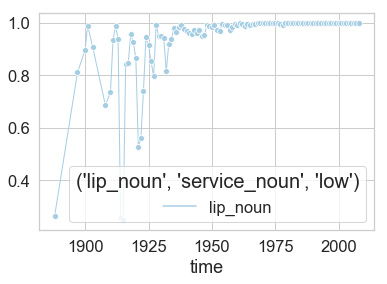

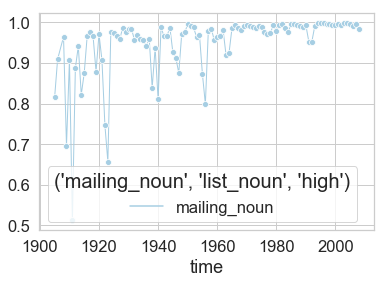

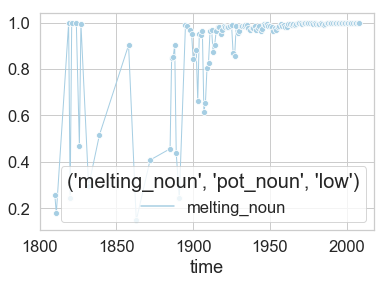

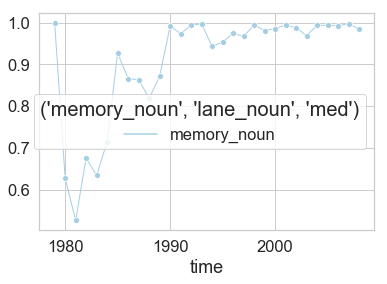

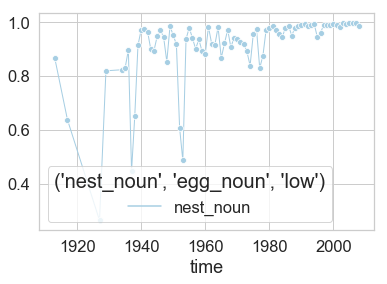

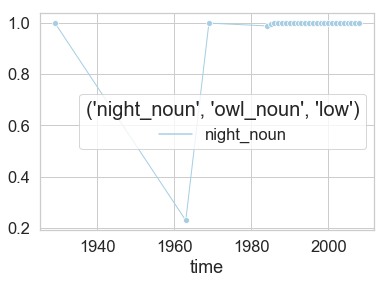

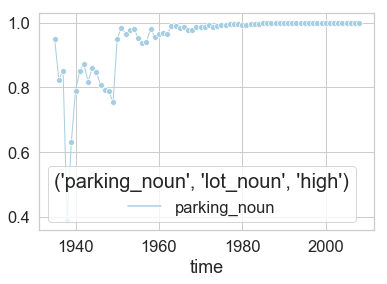

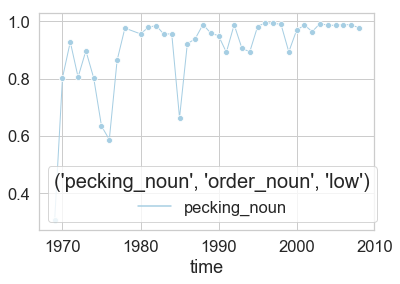

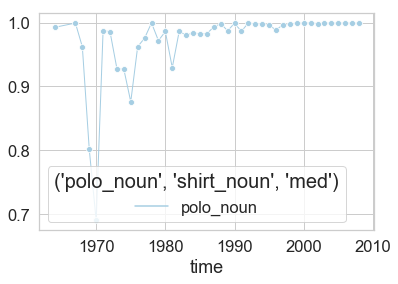

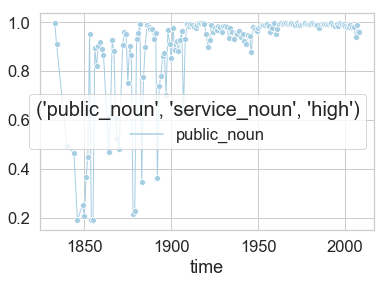

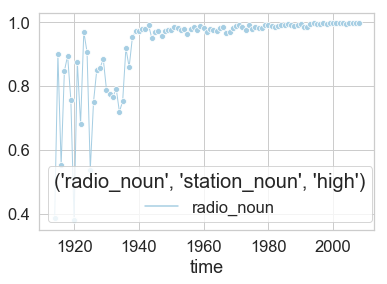

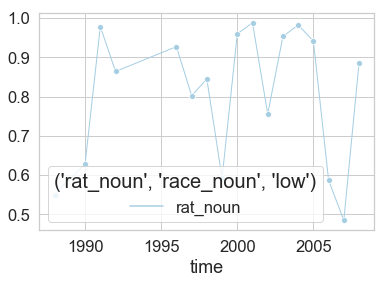

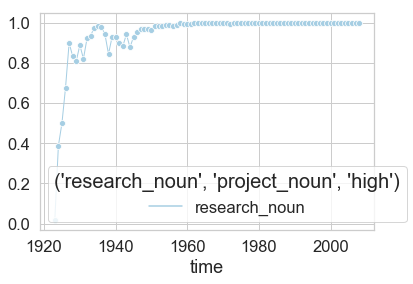

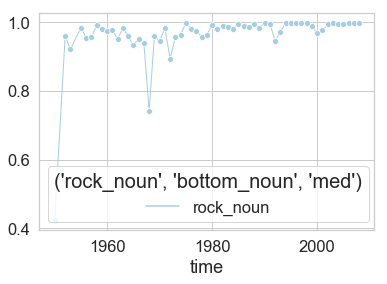

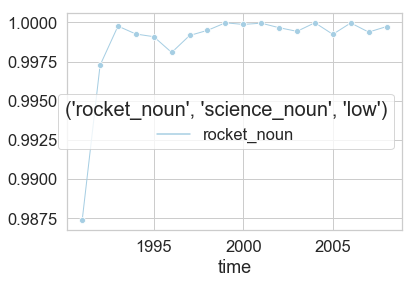

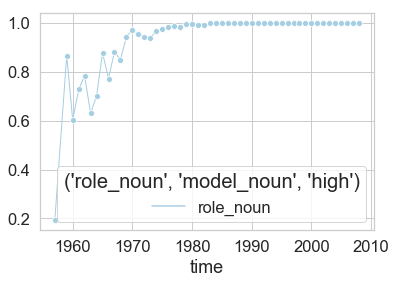

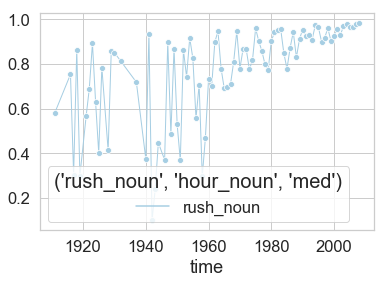

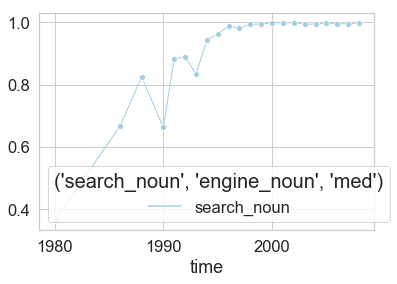

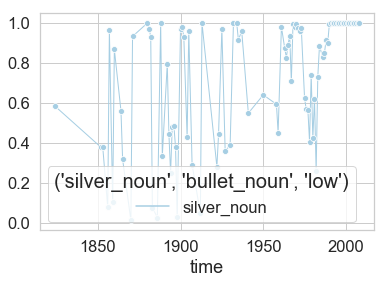

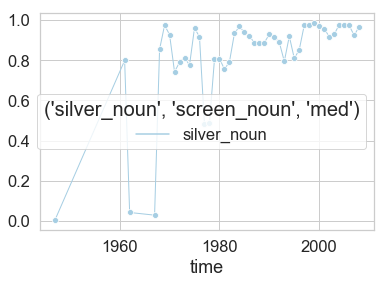

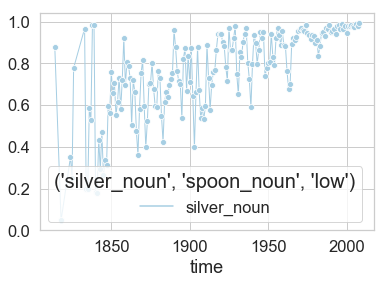

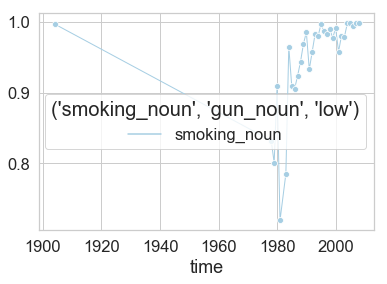

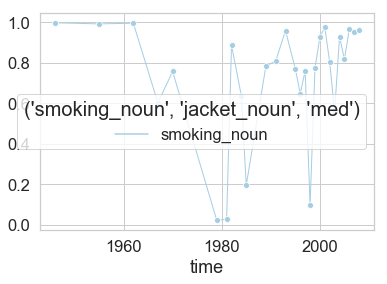

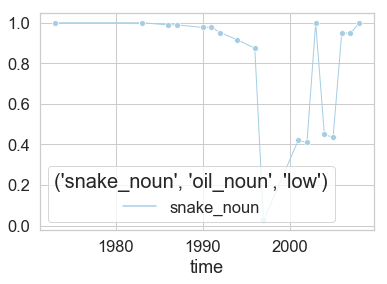

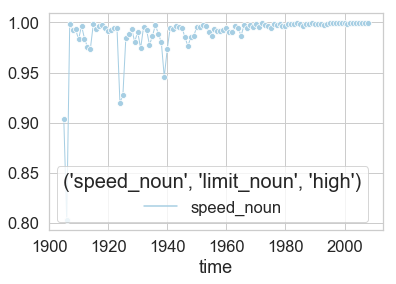

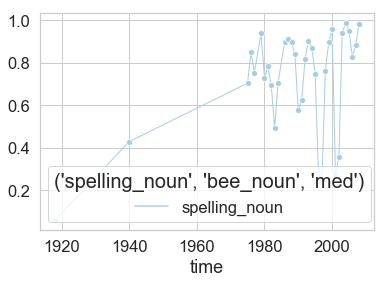

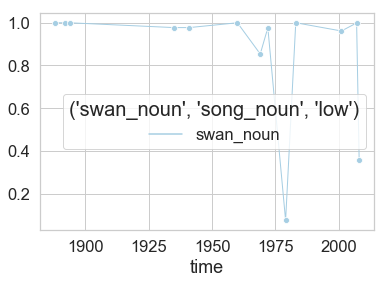

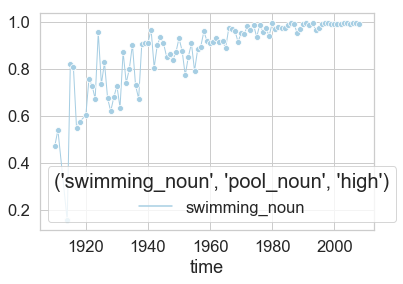

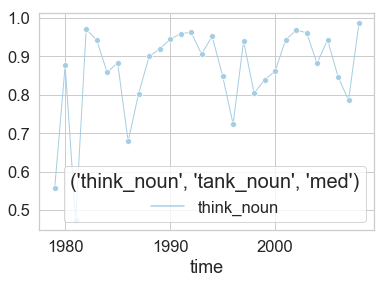

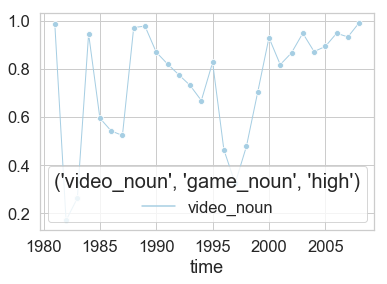

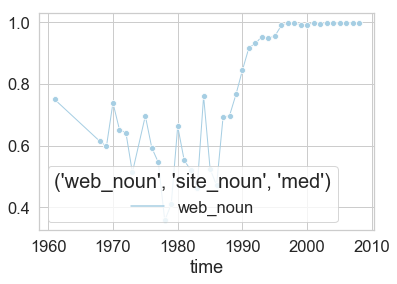

In [181]:
plt.figure(figsize=(10,10))
for i in range(0,compound_df.shape[0]):
    
    plt.figure()
    g=sns.lineplot(data=compound_df.iloc[i].to_frame(), palette="Paired", marker='o',linewidth=1,dashes=False)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    g.legend(title=compound_df.iloc[i].name, title_fontsize=20)

#g.set(ylim=(-150, 150))

In [ ]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_lmi_df.sample(n=10,random_state=1001).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))